# GRIP EXPLORATORY DATA ANALYSIS 

### PRESENTED BY :- K.G.SAMPRIT

## Global Terrorism Data

### Problem Statement

#### Global terrorism is described as the activities involving violence and crime with the intention to promote religious or political ideologies across the world. Global terrorism mainly consists of violence, threats and intimidation for pressurizing the government, International group or community in general.
#### Global Terrorism is a serious threat to the international community. Including, western individuals travelling or living abroad overseas and a substantial threat to indigenous individuals located near, or within unstable regions or areas of terrorist activity.

#### Globally, every region has recorded a higher average impact of terrorism in recent years than the early 2000s. The increase in the impact of terrorism was greatest felt in the Middle East and North Africa, followed by sub-Saharan Africa.

#### There is considered to be a heightened threat of terrorist attack globally, especially against western interests and nationals from groups, or individuals motivated by the recent conflicts in these areas.

### OBJECTIVE

#### As a Security or Defensive Analyst we need to find the hotzones of Terrorism

#### We need to Discover what are the security issues and other insights that we can get using the analysis

In [1]:
#Importing Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Necessary libraries for our dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins


In [3]:
# Reading our Global Terrorism Data
df = pd.read_csv('F:/Data Science/Spark Internship/Global Terrorism START data/globalterrorismdb_0718dist.csv', encoding='latin-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# To display all the rows and columns setting display option
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [5]:
# Checking the columns of our dataset
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
# Checking Categorical and Numerical variables in our dataset
categorical_col = df.select_dtypes(exclude = ['number']).columns.values
print('Categorical_features : \n {} \n\n'.format(categorical_col))

numerical_col = df.select_dtypes(include = ['number']).columns.values
print('Numerical_features : \n {} \n\n'.format(numerical_col))

Categorical_features : 
 ['approxdate' 'resolution' 'country_txt' 'region_txt' 'provstate' 'city'
 'location' 'summary' 'alternative_txt' 'attacktype1_txt'
 'attacktype2_txt' 'attacktype3_txt' 'targtype1_txt' 'targsubtype1_txt'
 'corp1' 'target1' 'natlty1_txt' 'targtype2_txt' 'targsubtype2_txt'
 'corp2' 'target2' 'natlty2_txt' 'targtype3_txt' 'targsubtype3_txt'
 'corp3' 'target3' 'natlty3_txt' 'gname' 'gsubname' 'gname2' 'gsubname2'
 'gname3' 'gsubname3' 'motive' 'claimmode_txt' 'claimmode2_txt'
 'claimmode3_txt' 'weaptype1_txt' 'weapsubtype1_txt' 'weaptype2_txt'
 'weapsubtype2_txt' 'weaptype3_txt' 'weapsubtype3_txt' 'weaptype4_txt'
 'weapsubtype4_txt' 'weapdetail' 'propextent_txt' 'propcomment' 'divert'
 'kidhijcountry' 'ransomnote' 'hostkidoutcome_txt' 'addnotes' 'scite1'
 'scite2' 'scite3' 'dbsource' 'related'] 


Numerical_features : 
 ['eventid' 'iyear' 'imonth' 'iday' 'extended' 'country' 'region'
 'latitude' 'longitude' 'specificity' 'vicinity' 'crit1' 'crit2' 'crit3'
 'doubtter

In [7]:
# Checking Columns and rows of our Dataset
df.shape

(181691, 135)

In [8]:
# Checking Statistical values for our dataset
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the correlation

In [9]:
df.corr().head()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767


## 2.Data Cleaning

In [10]:
# We gonna select only some particular columns for our further analysis and create new dataframe called as Terror
terror=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude",
               "longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
terror.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [11]:
# Renaming some columns
terror.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group_Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
#Checking the head of new dataframe
terror.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group_Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [12]:
# Checking info
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group_Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [13]:
# Checking the shape
terror.shape

(181691, 19)

In [14]:
# Verifying once again after renaming the columns
terror.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [15]:
# Checking null values in our dataset
terror.isnull().sum().sort_values(ascending=False)

Add Notes         153402
Motive            131130
Location          126196
Summary            66129
Wounded            16311
Killed             10313
Longitude           4557
Latitude            4556
City                 434
Province/State       421
Country                0
Region                 0
Month                  0
Attack Type            0
Target Type            0
Group_Name             0
Day                    0
Weapon Type            0
Year                   0
dtype: int64

In [16]:
# Checking null values using percentage and in ascending format
terror.isnull().sum().sort_values(ascending=False)/len(terror)*100

Add Notes         84.430159
Motive            72.171984
Location          69.456385
Summary           36.396409
Wounded            8.977330
Killed             5.676120
Longitude          2.508104
Latitude           2.507554
City               0.238867
Province/State     0.231712
Country            0.000000
Region             0.000000
Month              0.000000
Attack Type        0.000000
Target Type        0.000000
Group_Name         0.000000
Day                0.000000
Weapon Type        0.000000
Year               0.000000
dtype: float64

In [17]:
# Checking Duplicates Values in terror DataFrame
terror.duplicated().sum()

11317

In [18]:
# Dropping all Duplicates Values from Our Terror dataset 
terror.drop_duplicates(inplace=True)

In [19]:
# Checking Duplicates values again
terror.duplicated().sum()

0

In [20]:
# We will fills some missing values with 0
terror["Killed"]=terror["Killed"].fillna(0)
terror["Wounded"]=terror["Wounded"].fillna(0)
terror["Casualty"]=terror["Killed"]+terror["Wounded"]

In [21]:
# Checking the statistics
terror.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,170374.000000,170374.000000,170374.000000,166396.000000,1.663950e+05,170374.000000,170374.000000,170374.000000
mean,2003.247767,6.469092,15.519522,23.902412,-4.877978e+02,2.395066,3.055003,5.450069
std,13.116516,3.392268,8.813652,18.123178,2.112838e+05,11.569174,35.417017,41.851426
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.848490,8.500260e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.530243,4.366838e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.621521,6.909978e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


#### We can observe that data consist of Terror activities between the year 1970 and 2017

## Visualizing the Data

In [22]:
# Creating a dataframe called attacks and we will sort the year to check the attack in particular year.
attacks=terror["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,633
1971,454
1972,518
1973,465
1974,543


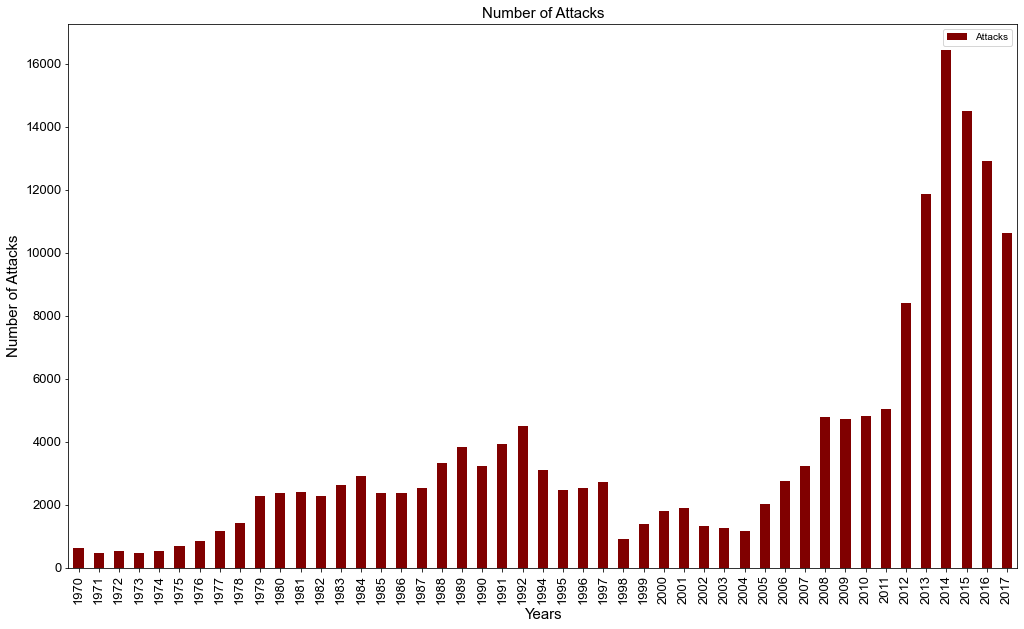

In [23]:
# Plotting bar chart for number of Attacks since 1970-2017
attacks.plot(kind="bar",color="maroon",figsize=(17,10),fontsize=13)
sns.set(style='darkgrid')
plt.title("Number of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

###### We can observe from above chart is that 2014 was the year where Highest Number of Attacks happend and 1971 was the lowest Attack.

In [24]:
# Creating dataframe for Total Casualities that is (killed + Wounded) in each year
Casualities=terror[['Year','Casualty']].groupby('Year').sum()
Casualities.head()

,Casualty
Year,
1970,385.0
1971,254.0
1972,962.0
1973,862.0
1974,1401.0


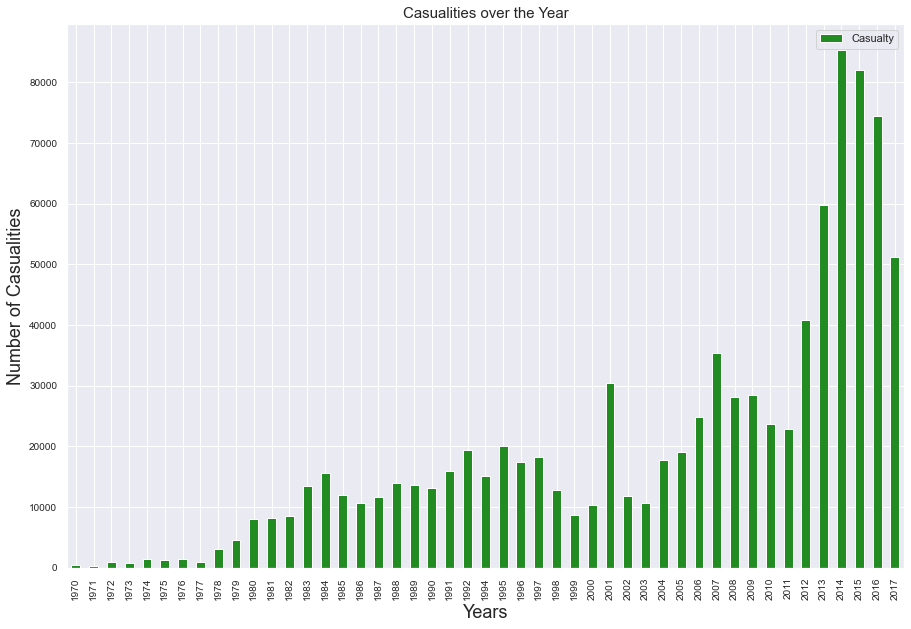

In [25]:
# Plotting Barchart for Casualities over the Year
Casualities.plot(kind='bar', color='forestgreen',figsize=[15,10], fontsize=10)
plt.title('Casualities over the Year', fontsize=15)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Casualities', fontsize=18)
plt.show()

##### we can observe from above chart is that most attack occured in 2014 with same casualties.

In [26]:
# Checking the killed in each year
killed=terror[['Year','Killed']].groupby('Year').sum()
killed.head()

,Killed
Year,
1970,173.0
1971,172.0
1972,553.0
1973,367.0
1974,537.0


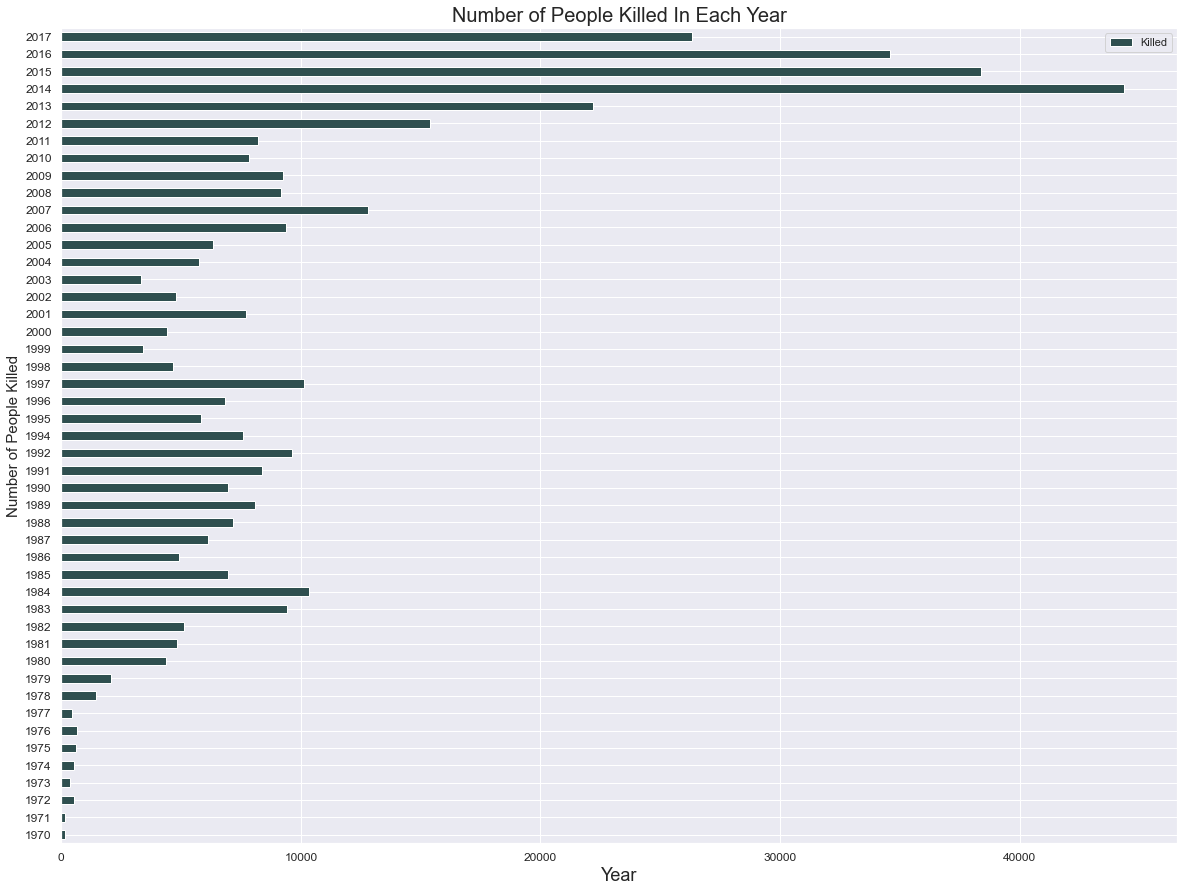

In [27]:
# Plotting Horizontal Barchart for number of people killed in each year
killed.plot(kind='barh',color='darkslategrey', figsize=[20,15], fontsize=12)
plt.title('Number of People Killed In Each Year', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of People Killed', fontsize=15)
plt.show()

##### 2014 was the year were large number of innocent people died.  less Number of people died on 1971.

#### Terrorist threatend Iraq country the most, followed by Pakistan,Afghanistan and India

In [29]:
# Checking the most attacked Region wise year. 
region=pd.crosstab(terror.Year, terror.Region)
region.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,27,460,62,1,10,3,48
1971,1,5,0,1,3,55,235,22,0,6,2,124
1972,5,3,0,0,1,48,72,21,1,12,2,353
1973,1,6,0,2,1,19,63,81,1,2,4,285
1974,1,11,0,4,2,38,105,60,2,3,7,310


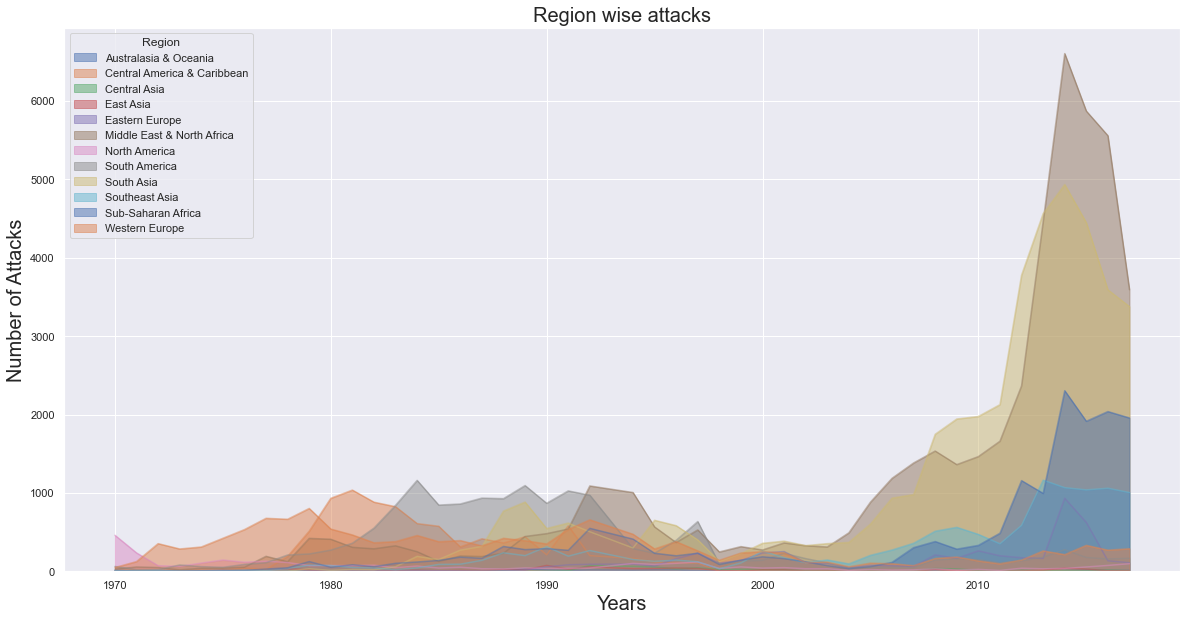

In [30]:
# Checking region wise attack using area plot .
region.plot(kind='area', stacked=False, alpha=0.5, figsize=(20,10))
plt.title('Region wise attacks', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Number of Attacks', fontsize=20)
plt.show()

In [31]:
# Chekcing number of casualities in each regions
reg_casualty=terror[['Casualty' ,'Region']].groupby('Region').sum().sort_values(by='Casualty', ascending=False)
reg_casualty

,Casualty
Region,
Middle East & North Africa,350258.0
South Asia,240449.0
Sub-Saharan Africa,130353.0
South America,44407.0
Southeast Asia,41501.0
Central America & Caribbean,37438.0
North America,26276.0
Western Europe,24721.0
Eastern Europe,19426.0


<Figure size 1080x432 with 0 Axes>

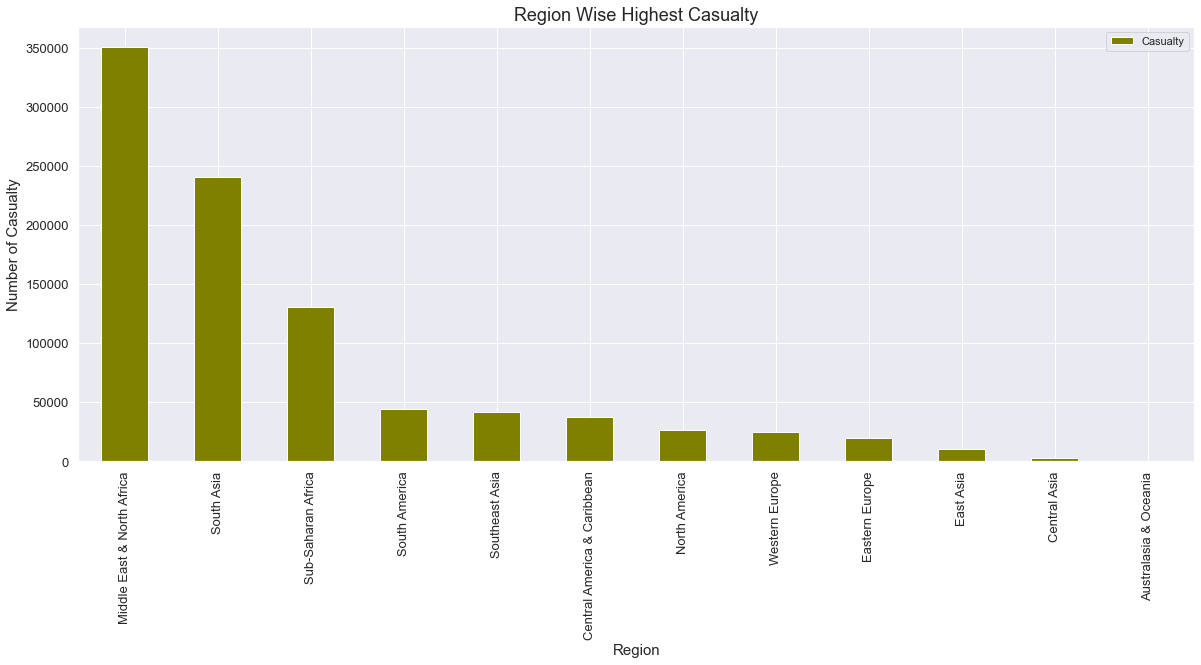

In [32]:
# plotting bar plot for region wise casualty
plt.figure(figsize=[15,6])
plt.rcParams["figure.figsize"] = (20,8)
reg_casualty.plot(kind="bar", color='olive', fontsize=13)
plt.title('Region Wise Highest Casualty', fontsize=18)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Number of Casualty', fontsize=15)
plt.show()

In [33]:
# Checking for Number of People Killed in each Countries
Country_kill=terror[['Country', 'Killed']].groupby('Country').sum().sort_values(by='Killed', ascending=False)
Country_kill.head()

,Killed
Country,
Iraq,78374.0
Afghanistan,39149.0
Pakistan,23501.0
Nigeria,22463.0
India,19156.0


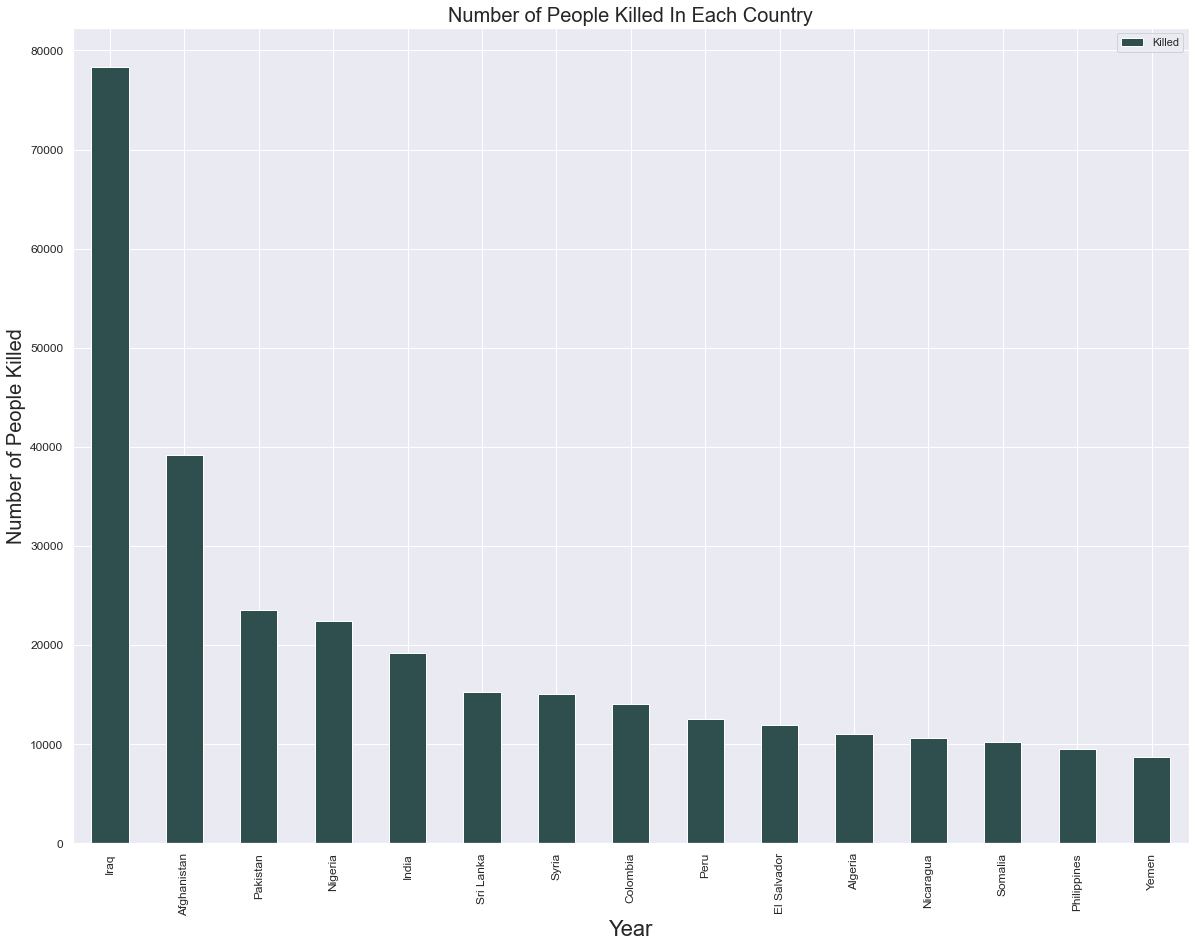

In [34]:
# Checking for Top 10 COuntries where most People Killed
Country_kill[:15].plot(kind='bar',color='darkslategrey', figsize=[20,15], fontsize=12)
plt.title('Number of People Killed In Each Country', fontsize=20)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Number of People Killed', fontsize=20)
plt.show()

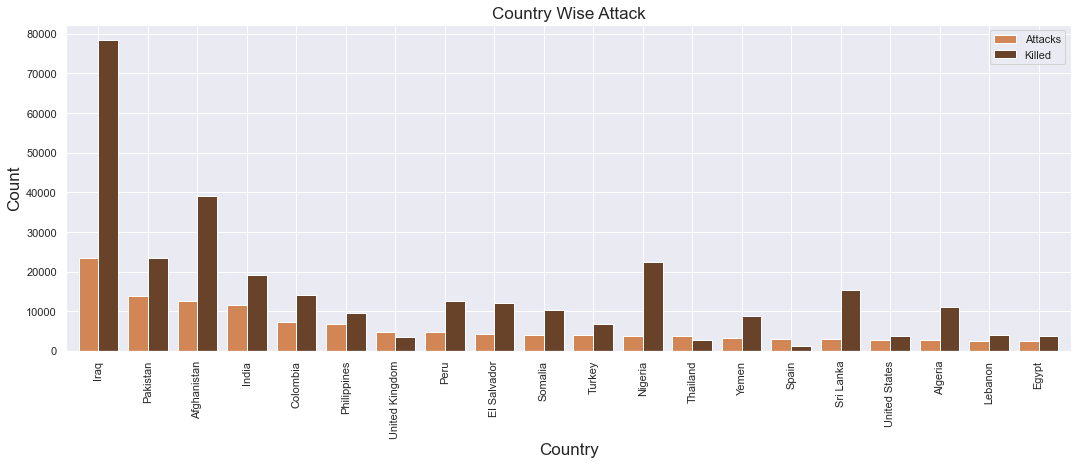

In [35]:
# Checking Country Wise Attack Wth Most number of Attacked and Killed .
attacks = terror.Country.value_counts()[:20].to_frame()
attacks.columns = ['Attacks']
kills = terror.groupby(['Country'])['Killed'].sum().sort_values(ascending =False).to_frame()
attacks.merge(kills, how = 'left' , left_index = True, right_index = True ).plot.bar(width = 0.8 , color = sns.color_palette('copper_r',2))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Country Wise Attack', fontsize=17)
plt.ylabel("Count" ,fontsize = 17)
plt.xlabel("Country",fontsize = 17)
plt.show()

In [36]:
# Checking number of attacks per city
city = terror['City'].value_counts()[1:13]
city.head()

Baghdad      7575
Karachi      2164
Mosul        2135
Belfast      1945
Mogadishu    1570
Name: City, dtype: int64

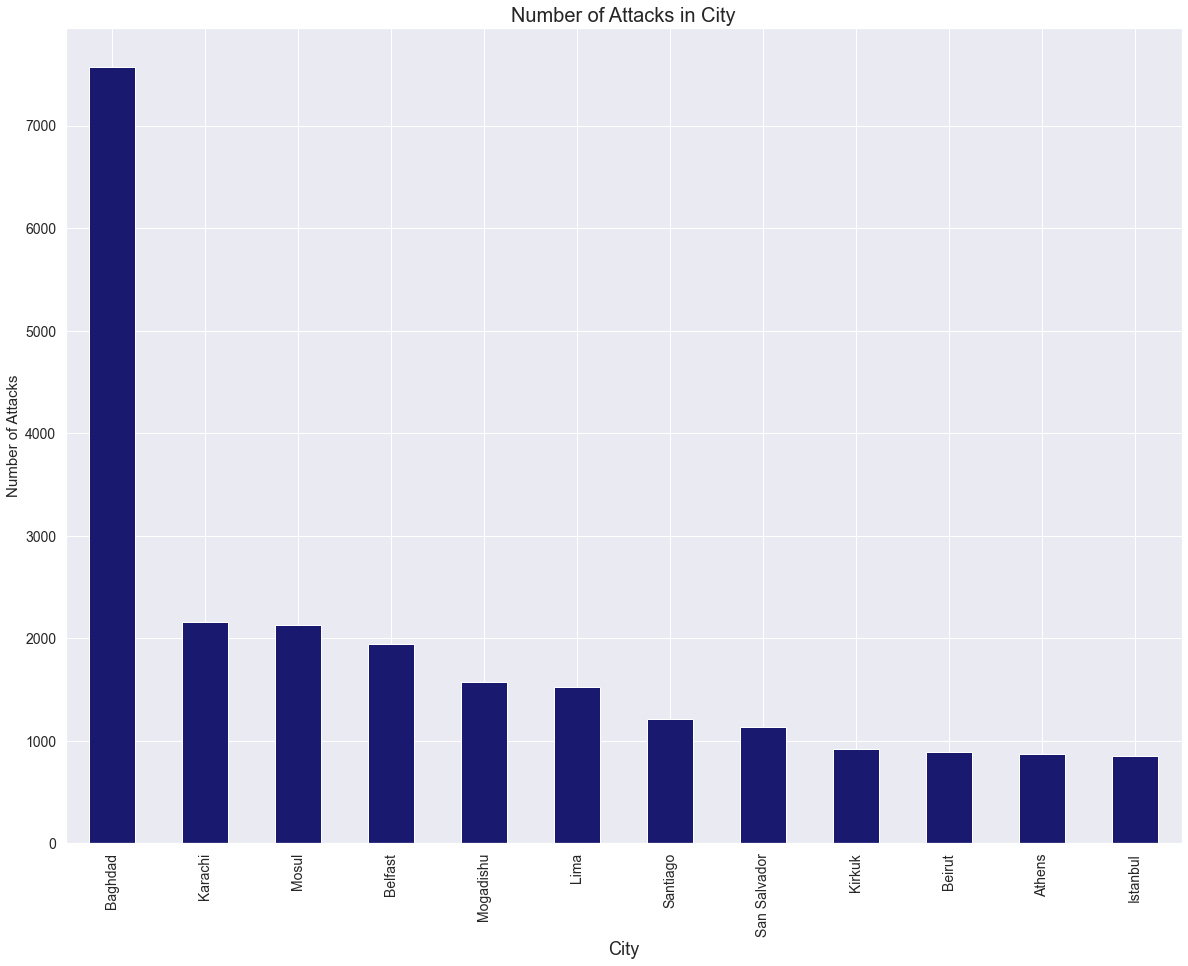

In [37]:
# Plotting Bar chart for Number of Attacks in City
city.plot(kind='bar', color='midnightblue', figsize=[20,15], fontsize=14)
plt.title('Number of Attacks in City', fontsize=20)
plt.xlabel('City', fontsize=18)
plt.ylabel('Number of Attacks', fontsize=15)
plt.show()

In [38]:
# Checking total number of Casualty at city in ascending order
kill_city=terror[['Killed', 'City']].groupby('City').sum().sort_values(by='Killed', ascending=False).drop('Unknown')
kill_city.head(10)

,Killed
City,
Baghdad,21118.0
Mosul,7123.0
Mogadishu,3908.0
Karachi,3390.0
New York City,2838.0
Tikrit,2672.0
Kabul,2493.0
Ramadi,2307.0
Maiduguri,2234.0


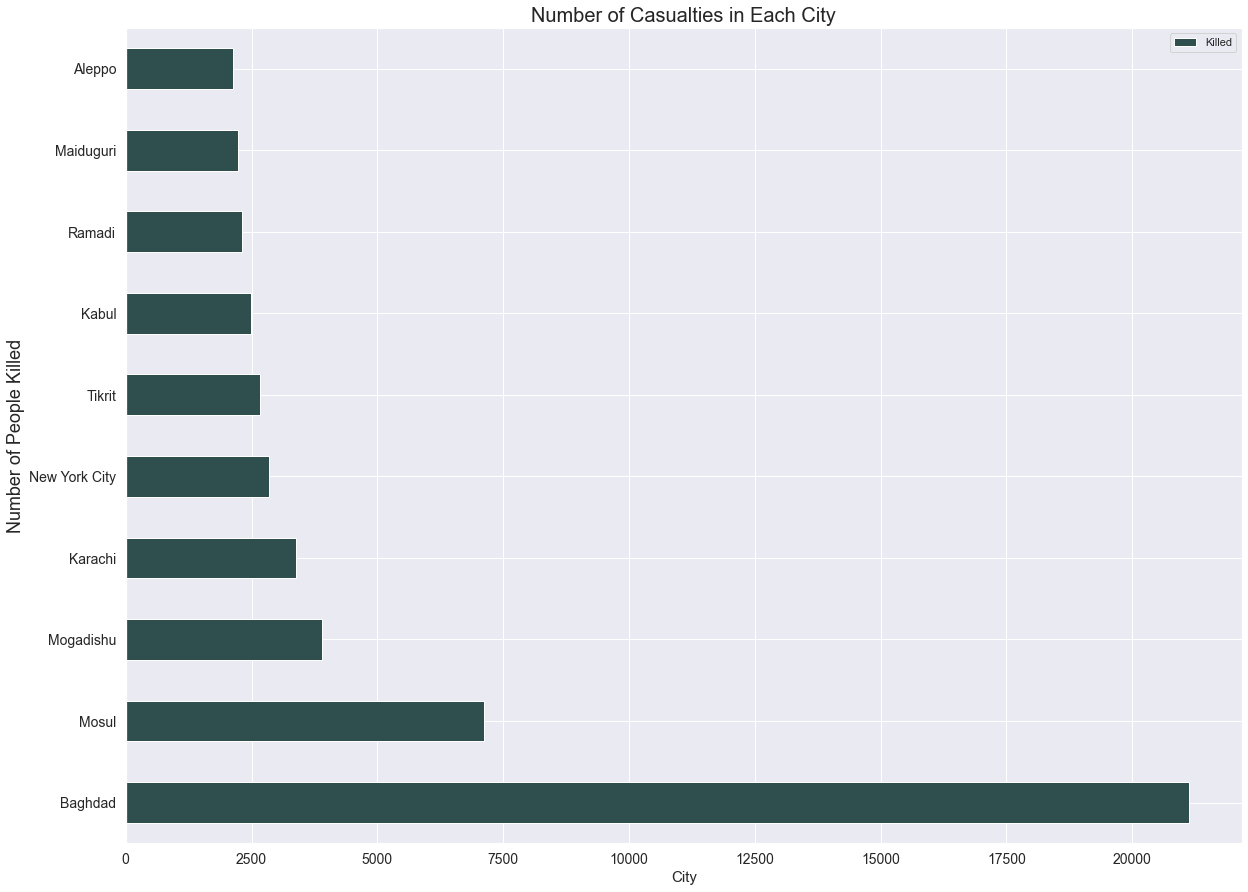

In [39]:
# Plotting Number of Casualties in Each city  using Barplot.
kill_city[:10].plot(kind='barh',color='darkslategrey', figsize=[20,15], fontsize=14)
plt.title('Number of Casualties in Each City', fontsize=20)
plt.xlabel('City', fontsize=15)
plt.ylabel('Number of People Killed', fontsize=18)
plt.show()

In [40]:
# Checking Which group Has made more Terrorist Attack
terror_group=terror['Group_Name'].value_counts()[1:11]
terror_group

Taliban                                             7304
Islamic State of Iraq and the Levant (ISIL)         5195
Shining Path (SL)                                   3551
Al-Shabaab                                          3266
New People's Army (NPA)                             2693
Farabundo Marti National Liberation Front (FMLN)    2441
Boko Haram                                          2383
Irish Republican Army (IRA)                         2362
Revolutionary Armed Forces of Colombia (FARC)       2358
Kurdistan Workers' Party (PKK)                      2231
Name: Group_Name, dtype: int64

##### Taliban Has made More Attack  and  followed by  ISIL and SL  

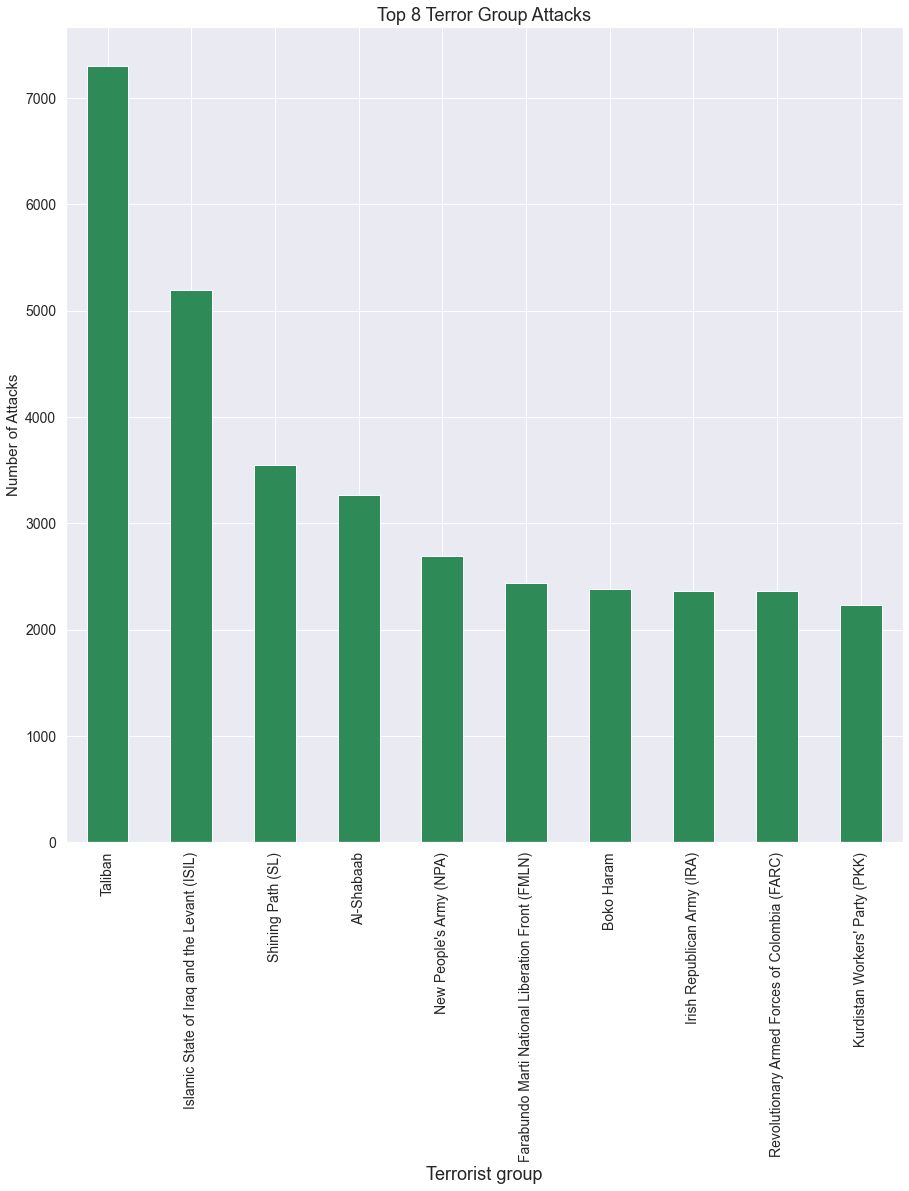

In [41]:
# Plotting chart for Top 8 terrorist Group.
terror_group[0:11].plot(kind='bar', fontsize=14,figsize=[15,15], color='seagreen')
plt.title('Top 8 Terror Group Attacks', fontsize=18)
plt.xlabel('Terrorist group', fontsize=18)
plt.ylabel('Number of Attacks', fontsize=15)
plt.show()

In [42]:
# Checking Top Group name and Year 
group_10=pd.crosstab(terror.Year, terror.Group_Name)
group_10.head()

Group_Name,1 May,14 K Triad,14 March Coalition,14th of December Command,15th of September Liberation Legion,16 January Organization for the Liberation of Tripoli,1920 Revolution Brigades,19th of July Christian Resistance Brigade,1st of May Group,2 April Group,...,Zimbabwe People's Army (ZIPA),Zintani Militia,Zionist Resistance Fighters,Zomi Revolutionary Army (ZRA),Zulu Militants,Zulu Miners,Zuwar al-Imam Rida,Zviadists,Zwai Tribe,leftist guerrillas-Bolivarian militia
Year,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1971,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Checking first 12 values for our analysis
terror_group10 = terror[terror.Group_Name.isin(terror.Group_Name.value_counts()[1:11].index)]
terror_group10.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group_Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
39,1970,1,31,Philippines,Southeast Asia,Tarlac,Bamban,15.675051,120.331618,NaN,NaN,Unknown,Military,New People's Army (NPA),NaN,Unknown,0.0,1.0,NaN,1.0
169,1970,4,2,Philippines,Southeast Asia,Pampanga,Mabalacat City,15.185916,120.541870,NaN,NaN,Unknown,Military,New People's Army (NPA),NaN,Unknown,2.0,0.0,NaN,2.0
364,1970,6,26,United Kingdom,Western Europe,Northern Ireland,Londonderry,55.011562,-7.312045,NaN,NaN,Armed Assault,Terrorists/Non-State Militia,Irish Republican Army (IRA),NaN,Incendiary,5.0,0.0,NaN,5.0
365,1970,6,27,United Kingdom,Western Europe,Northern Ireland,Londonderry,55.011562,-7.312045,NaN,NaN,Armed Assault,Private Citizens & Property,Irish Republican Army (IRA),NaN,Firearms,3.0,0.0,NaN,3.0
366,1970,6,27,United Kingdom,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,NaN,NaN,Armed Assault,Private Citizens & Property,Irish Republican Army (IRA),NaN,Firearms,1.0,0.0,NaN,1.0


In [44]:
# Checking for Top Terror Group Who made huge Killed.
grp_casualty=terror[['Group_Name','Killed']].groupby('Group_Name').sum().sort_values(by='Killed', ascending=False).drop('Unknown')
grp_casualty.head(10)

,Killed
Group_Name,
Islamic State of Iraq and the Levant (ISIL),38731.0
Taliban,29182.0
Boko Haram,20189.0
Shining Path (SL),11365.0
Liberation Tigers of Tamil Eelam (LTTE),10831.0
Al-Shabaab,9292.0
Farabundo Marti National Liberation Front (FMLN),7976.0
Nicaraguan Democratic Force (FDN),6657.0
Tehrik-i-Taliban Pakistan (TTP),6030.0


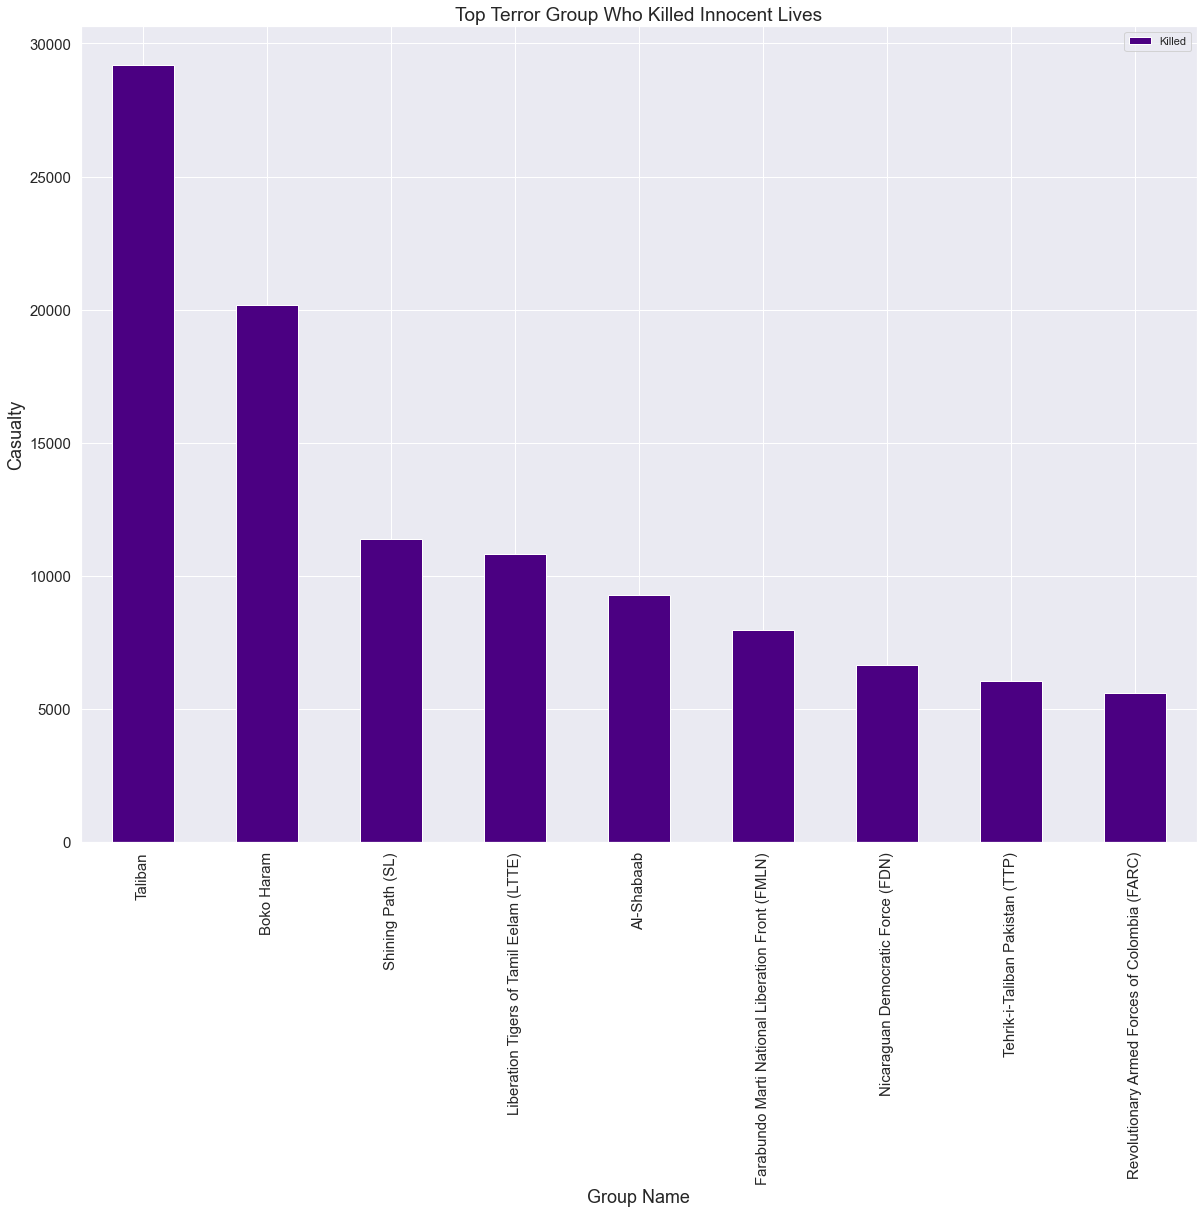

In [45]:
# Plotting for Top Terror group Who Made Huge Killed.
grp_casualty[1:10].plot(kind='bar', figsize=[20,15], color='indigo', fontsize=15)
plt.title('Top Terror Group Who Killed Innocent Lives', fontsize=19)
plt.xlabel('Group Name', fontsize=18)
plt.ylabel('Casualty', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [46]:
# Checking for counts in Attack type
type_attack=terror['Attack Type'].value_counts()
type_attack

Bombing/Explosion                      80922
Armed Assault                          41263
Assassination                          18681
Hostage Taking (Kidnapping)            10939
Facility/Infrastructure Attack          9170
Unknown                                 6896
Unarmed Assault                          933
Hostage Taking (Barricade Incident)      917
Hijacking                                653
Name: Attack Type, dtype: int64

In [47]:
# Checking for attack Type
type_attack['Other'] = type_attack[type_attack[:] <= 10000].sum()
type_attack

Bombing/Explosion                      80922
Armed Assault                          41263
Assassination                          18681
Hostage Taking (Kidnapping)            10939
Facility/Infrastructure Attack          9170
Unknown                                 6896
Unarmed Assault                          933
Hostage Taking (Barricade Incident)      917
Hijacking                                653
Other                                  18569
Name: Attack Type, dtype: int64

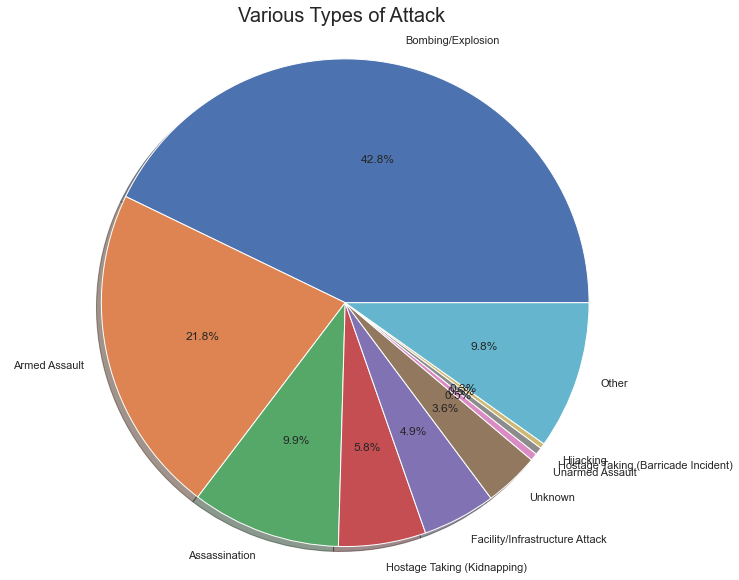

In [48]:
# Plotting pie chart for Various Type of Attack
plt.figure(figsize=(12,10))
plt.pie(type_attack.tolist(), labels=type_attack.index.tolist(), autopct='%1.1f%%',shadow=True, startangle=0)
plt.title('Various Types of Attack', fontsize=20)
plt.axis('equal')
plt.show()

In [49]:
# Checking for most number of People People Killed by Terrorist group in Which Country
terror_grp=terror[['Killed', 'Group_Name', 'Country']].groupby(['Group_Name','Country']).sum().sort_values(by='Killed', ascending=False).drop('Unknown')[:11]
terror_grp.head(10)

,,Killed
Group_Name,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,30955.0
Taliban,Afghanistan,29041.0
Boko Haram,Nigeria,16792.0
Shining Path (SL),Peru,11359.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10770.0
Al-Shabaab,Somalia,8140.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,7930.0
Islamic State of Iraq and the Levant (ISIL),Syria,6795.0
Nicaraguan Democratic Force (FDN),Nicaragua,6625.0


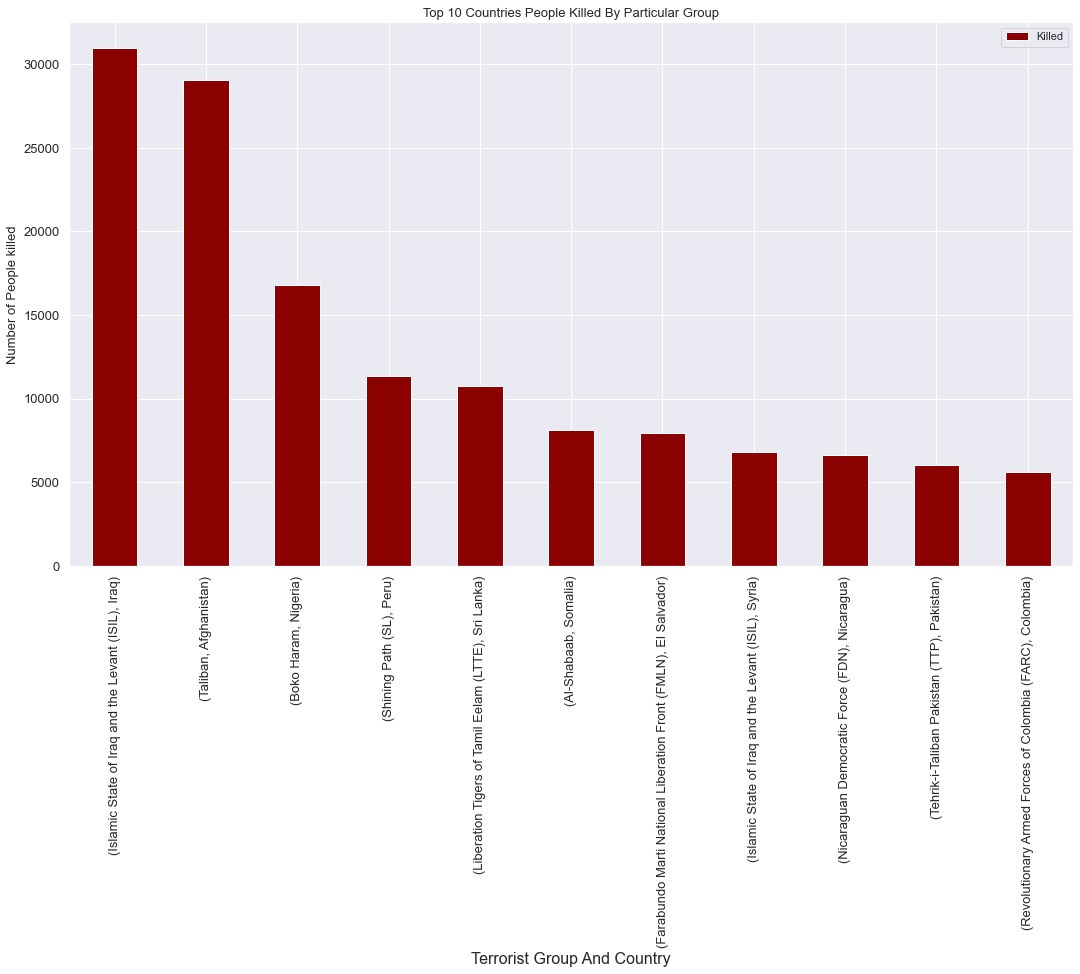

In [50]:
# Plotting Chart for Group Name which has Killed more number of People in Top 10 Countries
terror_grp.plot(kind='bar', color='darkred', figsize=(18,10), fontsize=13)
plt.title('Top 10 Countries People Killed By Particular Group', fontsize=13)
plt.xlabel('Terrorist Group And Country', fontsize=16)
plt.ylabel('Number of People killed', fontsize=13)
plt.show()

In [51]:
# Create new Terror_df_Group for Plotting on map
terror_df_group = terror.dropna(subset=['Latitude','Longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group_Name'])
terrorist_groups = terror.Group_Name.value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group.Group_Name.isin(terrorist_groups)]
print(terror_df_group.Group_Name.unique())

["New People's Army (NPA)" 'Shining Path (SL)'
 'Farabundo Marti National Liberation Front (FMLN)' 'Taliban' 'Al-Shabaab'
 'Boko Haram' 'Islamic State of Iraq and the Levant (ISIL)']


In [52]:
# Plotting World map to check Top Terroriest Group attack
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['Latitude'],terror_df_group.iloc[i]['Longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group_Name'], 
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

##### We can Observe that East asia and South America were the places were maximum number of Terrorist Attack started from 1970.

### Analysis For Country='India'

In [53]:
# Checking for India
Ind=terror[terror.Country == 'India']
Ind.head(5)

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group_Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
1186,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,NaN,Hijacking,Airports & Aircraft,Palestinians,NaN,Explosives,0.0,0.0,NaN,0.0
2764,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,The case is very unclear and there are many ru...,4.0
3857,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,NaN,Bombing/Explosion,Airports & Aircraft,Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
5327,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,NaN,NaN,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),NaN,Firearms,0.0,0.0,NaN,0.0
7337,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,NaN,NaN,Armed Assault,Police,Naga People,NaN,Firearms,0.0,0.0,NaN,0.0


In [54]:
#Checking various Info of IND
Ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11566 entries, 1186 to 181689
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            11566 non-null  int64  
 1   Month           11566 non-null  int64  
 2   Day             11566 non-null  int64  
 3   Country         11566 non-null  object 
 4   Region          11566 non-null  object 
 5   Province/State  11566 non-null  object 
 6   City            11566 non-null  object 
 7   Latitude        11410 non-null  float64
 8   Longitude       11410 non-null  float64
 9   Location        5270 non-null   object 
 10  Summary         9002 non-null   object 
 11  Attack Type     11566 non-null  object 
 12  Target Type     11566 non-null  object 
 13  Group_Name      11566 non-null  object 
 14  Motive          5615 non-null   object 
 15  Weapon Type     11566 non-null  object 
 16  Killed          11566 non-null  float64
 17  Wounded         11566 non-n

In [55]:
# Checking for null values
Ind.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
Province/State       0
City                 0
Latitude           156
Longitude          156
Location          6296
Summary           2564
Attack Type          0
Target Type          0
Group_Name           0
Motive            5951
Weapon Type          0
Killed               0
Wounded              0
Add Notes         9728
Casualty             0
dtype: int64

In [56]:
# Dealing with missing values
Ind=Ind.dropna()
Ind.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group_Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
2764,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,The case is very unclear and there are many ru...,4.0
65057,1997,3,29,India,South Asia,Jammu and Kashmir,Unknown,33.778175,76.576171,A bus station in the northern Kashmir region,3/29/1997: Two explosions occurred at a bus st...,Bombing/Explosion,Transportation,Muslim Rebels,"Specific motive is unknown; however, the blast...",Explosives,18.0,53.0,Sources note that the number of injured people...,71.0
68268,1998,10,16,India,South Asia,Manipur,Gelnel,25.209087,93.817886,This incident occurred in the T. Waichong area...,10/16/1998: Suspected Kuki militants attacked ...,Armed Assault,Transportation,Unknown,Unknown,Firearms,9.0,10.0,"At the time of this attack, there was a resurg...",19.0
68522,1999,2,13,India,South Asia,Manipur,Tuilaphai,24.340933,93.587597,The Army was traveling to Tuilaphai when it wa...,02/13/1999: The leader of a medical Army team ...,Armed Assault,Military,Unknown,Unknown,Firearms,9.0,0.0,"On the day of this attack, the Revolutionary P...",9.0
68861,1999,5,5,India,South Asia,Jammu and Kashmir,Dadsara,33.904121,75.085403,The incident occurred outside of the victim's ...,"5/5/1999: Ghulam Hassan Bhat, a leader of the ...",Assassination,Government (General),Hizbul Mujahideen (HM),Unknown,Firearms,1.0,2.0,Officers guarding the victim were suspended fo...,3.0


In [57]:
# Checking null values again
Ind.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
Province/State    0
City              0
Latitude          0
Longitude         0
Location          0
Summary           0
Attack Type       0
Target Type       0
Group_Name        0
Motive            0
Weapon Type       0
Killed            0
Wounded           0
Add Notes         0
Casualty          0
dtype: int64

In [58]:
# Checkign the statistical for India df
Ind.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,2009.363636,6.646607,15.553137,24.394387,84.488450,2.385403,4.774648,7.160051
std,4.631654,3.207856,8.628593,4.778039,6.564316,6.775048,14.719181,19.056966
min,1975.000000,1.000000,0.000000,9.925201,69.612516,0.000000,0.000000,0.000000
25%,2008.000000,4.000000,8.000000,22.046250,80.493827,0.000000,0.000000,0.000000
50%,2010.000000,7.000000,16.000000,24.323812,84.672848,1.000000,0.000000,2.000000
75%,2011.000000,9.000000,23.000000,26.149794,90.287464,2.000000,3.000000,7.000000
max,2017.000000,12.000000,31.000000,34.542597,95.900036,115.000000,235.000000,272.000000


##### As we can observe that Maximum 188 people were killed .
##### 817 People were maximum wounded
##### Casualty was 1005 people

In [59]:
# Checking the rows and columns.
Ind.shape

(781, 20)

In [60]:
# Checking number of Terror Attacks in India During 1970 - 2017
ind_attk=terror['Year'].value_counts().sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
ind_attk.head()

,Attacks
Year,
1970,633
1971,454
1972,518
1973,465
1974,543


<Figure size 1440x1080 with 0 Axes>

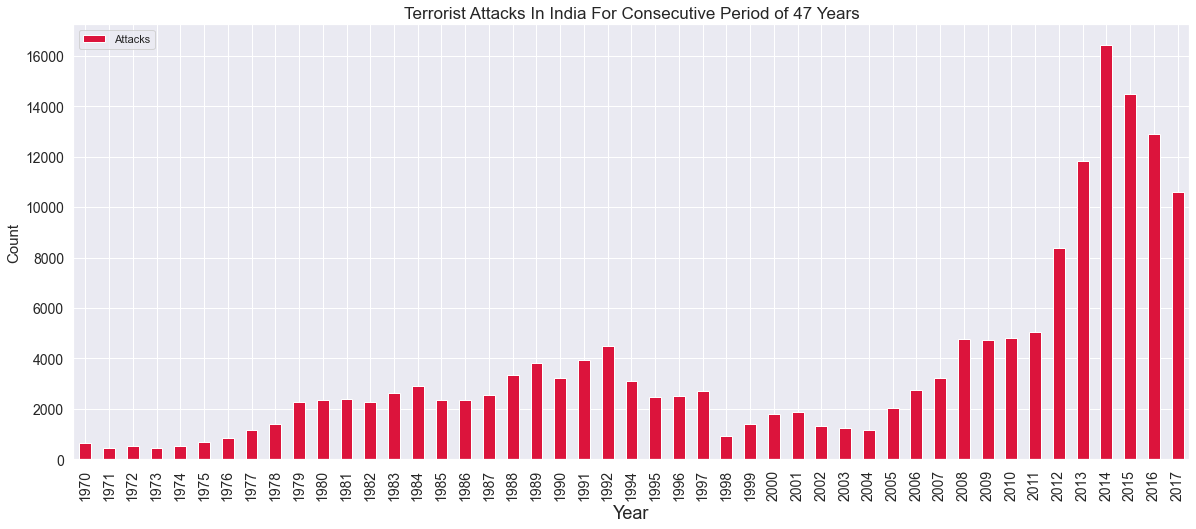

In [61]:
# Plotting Barchart for Most Terror Attack in India During 1970-2017
plt.figure(figsize=[20,15])
ind_attk.plot(kind='bar', color='crimson', fontsize=14)
plt.title('Terrorist Attacks In India For Consecutive Period of 47 Years', fontsize=17)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Count', fontsize=15)
plt.show()

In [62]:
# Checking Number Of Attacks In particular Indian Cities
ind_city=Ind.City.value_counts().drop('Unknown')
ind_city.head(10)

Imphal                     37
Srinagar                   19
Ahmedabad                  17
Guwahati                   10
New Delhi                   9
Bangalore                   9
Khunti district             9
Mumbai                      8
Patna                       7
West Midnapore district     6
Name: City, dtype: int64

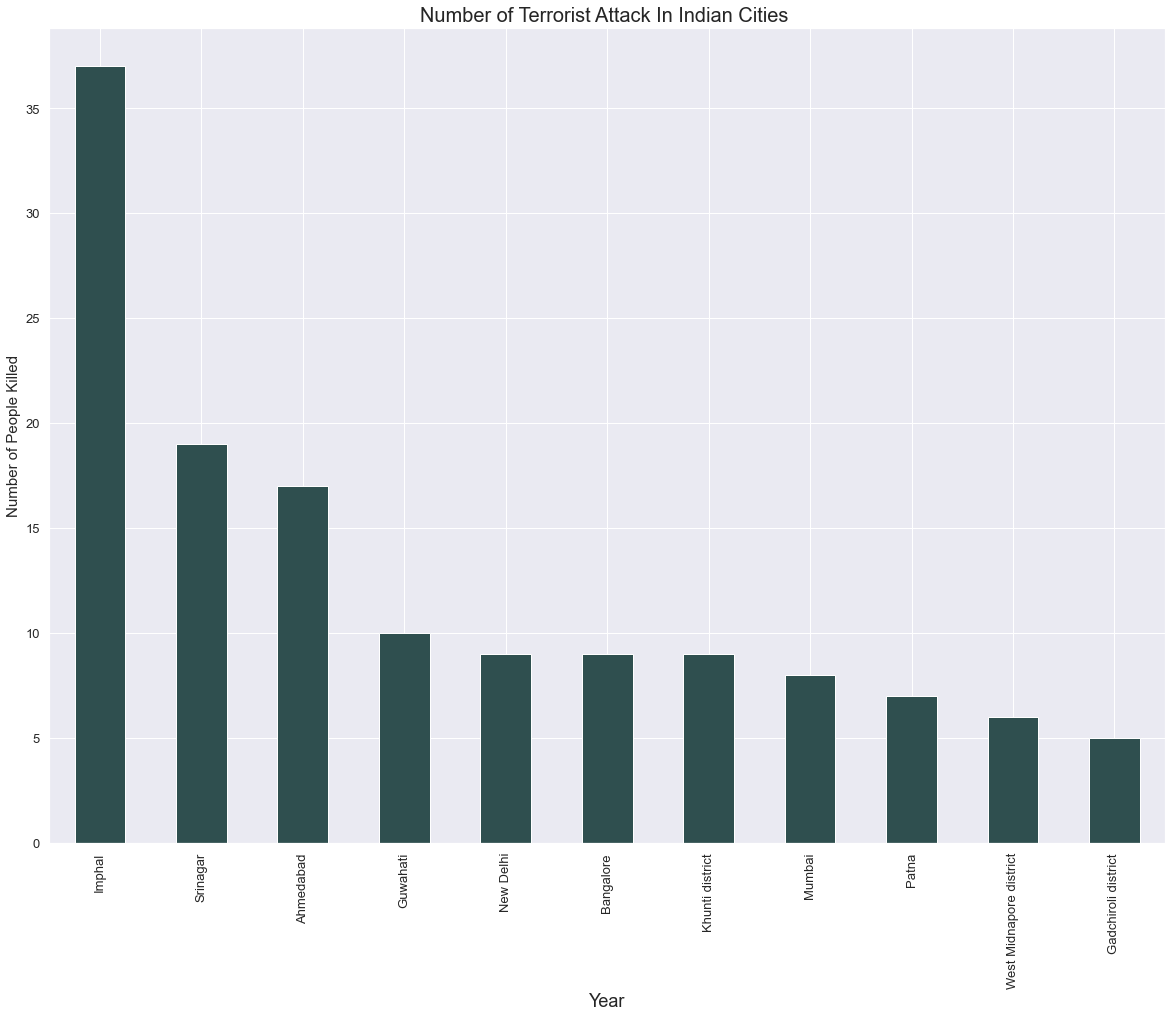

In [63]:
# Plotting Barchart for Most terrorist Attack in Indian Cities.
ind_city[0:11].plot(kind='bar',color='darkslategrey', figsize=[20,15], fontsize=13)
plt.title('Number of Terrorist Attack In Indian Cities ', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of People Killed', fontsize=15)
plt.show()

In [64]:
# Checkign Number of People Killed during the Terrorist attack
ind_killed=terror[['Target Type', 'Killed']].groupby('Target Type').sum().sort_values(by='Killed', ascending=False)
ind_killed.head()

,Killed
Target Type,
Private Citizens & Property,138956.0
Military,105299.0
Police,53120.0
Government (General),25940.0
Business,23391.0


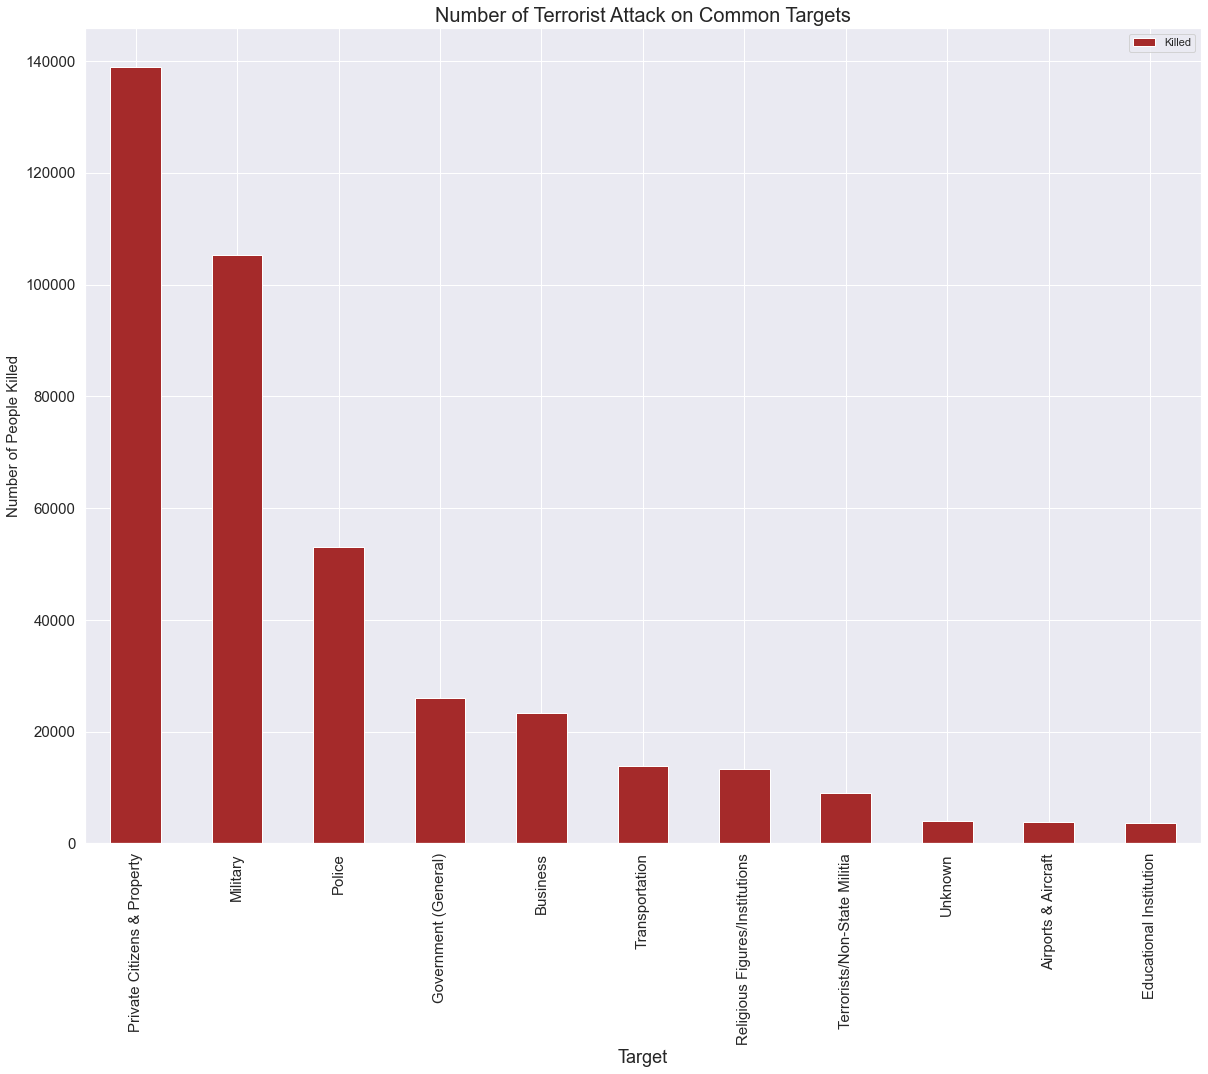

In [65]:
# Plotting Barchart for Number of Terrorist on Common targets.
ind_killed[0:11].plot(kind='bar',color='brown', figsize=[20,15], fontsize=15)
plt.title('Number of Terrorist Attack on Common Targets', fontsize=20)
plt.xlabel('Target', fontsize=18)
plt.ylabel('Number of People Killed', fontsize=15)
plt.show()

In [66]:
# Checking the number of Attack type that has been used by Terrorist in India.
type_attack=Ind['Attack Type'].value_counts()
type_attack

Bombing/Explosion                      327
Armed Assault                          217
Hostage Taking (Kidnapping)            137
Facility/Infrastructure Attack          41
Assassination                           32
Unknown                                 10
Unarmed Assault                          8
Hijacking                                5
Hostage Taking (Barricade Incident)      4
Name: Attack Type, dtype: int64

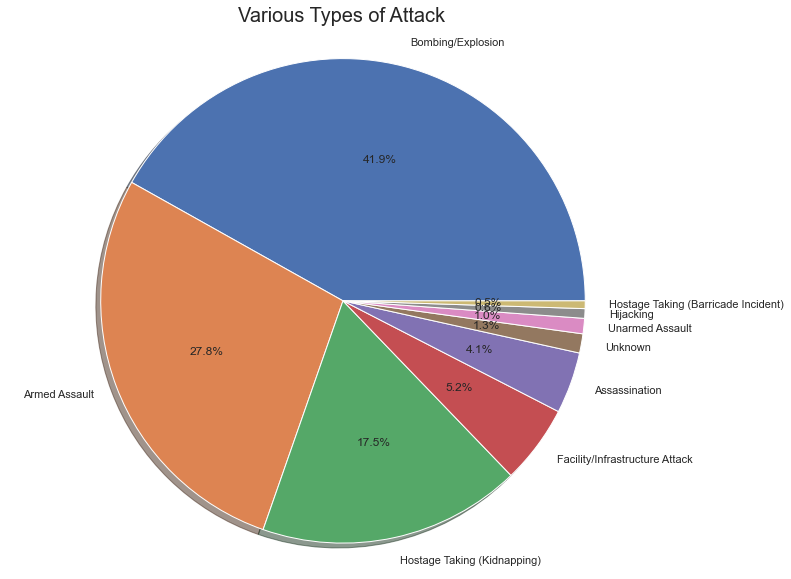

In [67]:
# Plotting Pie chart for Various Type of Attack.
plt.figure(figsize=(12,10))
plt.pie(type_attack.tolist(), labels=type_attack.index.tolist(), autopct='%1.1f%%',shadow=True, startangle=0)
plt.title('Various Types of Attack', fontsize=20)
plt.axis('equal')
plt.show()

In [68]:
# Checking for Terrorist Group Name
Ind.Group_Name.value_counts().drop('Unknown').head(10)

Communist Party of India - Maoist (CPI-Maoist)    296
United Liberation Front of Assam (ULFA)            42
Maoists                                            34
Indian Mujahideen                                  33
Hizbul Mujahideen (HM)                             21
National Democratic Front of Bodoland (NDFB)       20
National Liberation Front of Tripura (NLFT)        14
Militants                                          13
Garo National Liberation Army                      10
Kangleipak Communist Party (KCP)                   10
Name: Group_Name, dtype: int64

In [69]:
# Checking 2008 Deadliest Mumbai Attack
mumbai_attk=Ind.loc[(Ind["Year"] == 2008) & (Ind["City"] == "Mumbai")]
mumbai_attk.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group_Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
89645,2008,11,26,India,South Asia,Maharashtra,Mumbai,18.906703,72.814712,The attack took place at the Chabad-Lubavitch ...,"11/26/2008: On Wednesday night, two assailants...",Hostage Taking (Barricade Incident),Religious Figures/Institutions,Deccan Mujahideen,The attack was a plan devised six months ago t...,Explosives,9.0,0.0,This was one of eight related attacks (cf. 200...,9.0
89646,2008,11,26,India,South Asia,Maharashtra,Mumbai,19.075984,72.877656,The attack took place in Fiat taxis in Wadi Bu...,"11/26/2008: On Wednesday night, three people w...",Bombing/Explosion,Transportation,Deccan Mujahideen,The specific motive for the attack is unknown.,Explosives,3.0,0.0,This was one of eight related attacks (cf. 200...,3.0
89647,2008,11,26,India,South Asia,Maharashtra,Mumbai,19.075984,72.877656,The attack took place at the Chhatrapati Shiva...,"11/26/2008: On Wednesday night, two gunmen, Is...",Armed Assault,Transportation,Deccan Mujahideen,The attack was a plan devised six months ago t...,Firearms,58.0,76.0,This was one of eight related attacks (Event I...,134.0
89649,2008,11,26,India,South Asia,Maharashtra,Mumbai,19.075984,72.877656,The attack took place at the Cama and Albless ...,"11/26/2008: On Wednesday night, after attackin...",Hijacking,Police,Deccan Mujahideen,The police vehicle was targeted in the attack ...,Firearms,4.0,2.0,This was one of eight related attacks (cf. 200...,6.0
89653,2008,11,26,India,South Asia,Maharashtra,Mumbai,19.075984,72.877656,The attack took place at the Leopold Café in M...,11/26/2008: On Wednesday evening at about 2150...,Armed Assault,Business,Deccan Mujahideen,The attack was a plan devised six months ago t...,Explosives,9.0,76.0,This was one of eight related attacks (Event I...,85.0


In [70]:
# Plotting for Mumbai map to check the attack type
mumbai_map = folium.Map(location=[19, 72], zoom_start=4)

mumbai_attk.apply(lambda row: folium.Marker(location=[row['Latitude'], row['Longitude']],
                                           popup=row['Killed']).add_to(mumbai_map), axis=1)
mumbai_map

In [71]:
# Checking for Bombing/Explosion in India
bomb_attk = Ind[Ind["Attack Type"] == "Bombing/Explosion"]
bomb_attk.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group_Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
2764,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",Bombing/Explosion,Government (General),Ananda Marga,Unknown,Explosives,4.0,0.0,The case is very unclear and there are many ru...,4.0
65057,1997,3,29,India,South Asia,Jammu and Kashmir,Unknown,33.778175,76.576171,A bus station in the northern Kashmir region,3/29/1997: Two explosions occurred at a bus st...,Bombing/Explosion,Transportation,Muslim Rebels,"Specific motive is unknown; however, the blast...",Explosives,18.0,53.0,Sources note that the number of injured people...,71.0
69303,1999,8,7,India,South Asia,Assam,Bijni,26.495980,90.702507,The incident happened at the Pakajani Bridge b...,8/7/1999: A bomb exploded at the Pakajani Brid...,Bombing/Explosion,Private Citizens & Property,United Liberation Front of Assam (ULFA),"Specific motive is unknown, but sources specul...",Explosives,0.0,0.0,This incident led to the search of other areas...,0.0
69305,1999,8,7,India,South Asia,Assam,Bijni,26.495980,90.702507,A railway track over Dulani river between Bijn...,8/7/1999: An improvised explosive device (IED)...,Bombing/Explosion,Private Citizens & Property,United Liberation Front of Assam (ULFA),"Specific motive is unknown, but sources specul...",Explosives,0.0,0.0,A bomb had detonated previously that day on a ...,0.0
69684,1999,11,11,India,South Asia,Himachal Pradesh,Kandrori,32.184316,75.669148,This incident took place on a train minutes be...,11/11/1999: Eleven people were killed and 100 ...,Bombing/Explosion,Transportation,Unknown,Unknown,Explosives,11.0,100.0,Kashmiri separatist militants were suspected f...,111.0


In [72]:
# Plotting for India map
india = folium.Map(location = [20.5937, 78.9629], zoom_start = 5)               # Coordinates Location of India

# Creating a mark cluster object for the incidents in dataframe
incidents = plugins.MarkerCluster().add_to(india)

# Using loop for the dataframe and adding each data points to the mark
for lat, lng, label, in zip(bomb_attk['Latitude'], bomb_attk['Longitude'], bomb_attk['Killed']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(incidents)

# Display for India Map
india

## Insights Derived from the above EDA
#### 1) 2014 Was the Highest Terrorist Attack and Highest People Have killed in the same year.
#### 2) Iraq was the Most threatened Country, While it was the country in the top 10 were Most Number of People Killed.
#### 3) The Middle east and North Africa was the most Targeted Regions as per our analysis.
#### 4) Taliban and ISIL Was the Most Dangerous Terrorist Group .
#### 5) Bhagdad was the Most dangerous City in terms of Most Attack in city with count of 7575 .
#### 6) Communist Party of India - Maoist (CPI-Maoist) - 296 was the Deadlist Terror group in India.
#### 7) Taliban activities saw maximum casualities and usage of high amount of explosives.
#### 8) Gambia and Ireland have completely tackled high terrorist activities.(due to low terror activities).
#### 9)  While Coming to Analysis on India  We can observe that year 2014 where Terrorsit Attacked the most, Terrorist Targeted  private Citizens and Property , Srinagar was the most Top Cities In which terrorist  Attacked the most. 
#### 10) Most Terrorist attack that occured in India was Jammu and Kashmir and Delhi followed by Mumbai.
